# Under Armour Customer Churn
__Author__: David O'Donnell

---

## Problem Statement and Summary 

### Business Case
* A marketing manager is planning a new campaign designed to increase customer retention. Their plan is to deliver the campaign to a targeted audience defined as customers who are likely to abandon the brand within six months. This notebook contains a model that explores the underlying dataset and can identify these customers.

### Data
* The dataset provided is a snapshot of consumer purchase history taken in mid-June. Customers who made no additional purchases during the six months following the snapshot period were assigned a `churn` value of 1 to indicate that they had abandoned the brand.
* There were no additional measurements that the manager could reliably provide, so the model has been built using only the information provided here.

---

# Import Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set seaborn as default template for plots
sns.set()

# Expand pandas display output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Remove Future Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load dataset from CSV
path = 'C:\\Users\\577497\\Documents\\GitHub\\Customer-Churn\\2022_03_16\\'
#path = '/Users/davidodonnell/Documents/GitHub/Customer-Churn/'
filename = 'train.csv'

df = pd.read_csv(path+filename, header=0, parse_dates=True).rename(columns={'apparell_spend': 'apparel_spend'})

---

## View Data

In [3]:
# View Columns and Memory Usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_purchase    2666 non-null   float64
 1   max_discount     2665 non-null   float64
 2   shoe_spend       2666 non-null   float64
 3   apparel_spend    2666 non-null   object 
 4   acc_spend        2666 non-null   int64  
 5   custserv_calls   2666 non-null   int64  
 6   churn            2666 non-null   int64  
 7   acc_purchasers   2666 non-null   int64  
 8   promo_purchaser  2666 non-null   int64  
 9   shoe_orders      2666 non-null   int64  
 10  apparel_orders   2666 non-null   int64  
 11  acc_orders       2666 non-null   int64  
 12  gender           2666 non-null   object 
 13  ecommShopper     2666 non-null   bool   
 14  bhShopper        2666 non-null   bool   
 15  state            2666 non-null   object 
 16  area_code        2666 non-null   int64  
 17  phone         

In [4]:
# View First Ten Lines of Data
df.head(10)

,last_purchase,max_discount,shoe_spend,apparel_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
0,56.5,0.26,322.2,194.3,126,1,0,0,1,3,2,4,Male,False,True,MS,510,402-5509
1,84.0,0.46,279.1,170.9,92,0,0,0,1,2,2,3,Male,False,False,OH,510,370-3021
2,96.0,0.00,294.7,306,96,1,1,0,0,2,3,3,Female,True,False,MI,415,373-1448
3,62.0,0.00,255.4,185.6,100,2,0,0,0,2,2,3,Male,False,False,VT,510,403-1769
4,45.0,0.28,300.6,197.9,154,0,0,0,1,3,2,5,Male,False,True,WV,408,405-9384
5,68.5,0.00,243.4,217,96,0,0,0,0,2,3,3,Male,True,False,FL,408,384-6654
6,58.0,0.00,241.9,137.9,77,1,1,1,0,2,2,3,Female,False,True,MA,408,371-9457
7,62.0,0.26,226.3,220.3,66,1,0,0,1,2,3,2,Female,False,False,WA,415,380-6631
8,101.5,0.00,180.7,97.8,93,1,0,0,0,1,2,3,Male,False,True,NY,510,379-2991
9,80.0,0.32,159.7,124.4,106,2,0,1,1,1,2,3,Female,False,True,ID,415,345-5980


In [5]:
# View Numerical Data
df.describe()

,last_purchase,max_discount,shoe_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,area_code
count,2666.000000,2665.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,70.961553,0.081418,245.565304,102.430983,1.556264,0.149287,0.097524,0.277944,2.044261,2.159790,3.251688,437.737059
std,19.978791,0.136785,54.538190,27.921276,1.312955,0.356438,0.296726,0.448070,0.534996,0.495355,0.816830,42.679743
min,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,408.000000
25%,57.625000,0.000000,208.500000,85.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,415.000000
50%,71.500000,0.000000,245.350000,103.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,415.000000
75%,84.500000,0.200000,282.675000,121.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,510.000000
max,121.000000,0.500000,411.800000,200.000000,9.000000,1.000000,1.000000,1.000000,3.000000,3.000000,6.000000,510.000000


In [6]:
# Number of Unique Values per Column
for col in df.columns:
    print(F'{col}: {df[col].nunique()}')

last_purchase: 210
max_discount: 44
shoe_spend: 1507
apparel_spend: 1447
acc_spend: 160
custserv_calls: 10
churn: 2
acc_purchasers: 2
promo_purchaser: 2
shoe_orders: 3
apparel_orders: 3
acc_orders: 7
gender: 2
ecommShopper: 2
bhShopper: 2
state: 53
area_code: 3
phone: 2666


---

# Cleanse Data

## Clean Up Data (Types and Errors)

In [7]:
df['phone_number'] = df['area_code'].astype(str) + '-' + df['phone'].astype(str)

In [8]:
df.set_index('phone_number', inplace=True)
df.drop('phone', axis=1, inplace=True)

In lieu of customer id (which was not present in the dataset), "phone_number" is a unique value that can serve as the primary key.

### Handling Missing Data and Null Values

In [9]:
# Examine Missing and Null Values
df.isnull().sum()

last_purchase      0
max_discount       1
shoe_spend         0
apparel_spend      0
acc_spend          0
custserv_calls     0
churn              0
acc_purchasers     0
promo_purchaser    0
shoe_orders        0
apparel_orders     0
acc_orders         0
gender             0
ecommShopper       0
bhShopper          0
state              0
area_code          0
dtype: int64

In [10]:
# Improper value in apparel_spend
df.loc[df['max_discount'].isnull()]

# Impute errant value with median apparel_spend/apparel_orders * apparel_orders
df['max_discount'] = np.where(df['max_discount'].isnull(), 0, df['max_discount'])

Any maximum discounts that are errant/null have been imputed with 0 as there were no customers marked as "promo_purchaser". 

In [11]:
# Improper value in apparel_spend
df.loc[df['apparel_spend']=='a']

# Impute errant value with median apparell_spend/apparel_orders * apparel_orders
median_apparel_spend_order = df[['apparel_spend']].loc[df['apparel_spend']!='a'].median().values//df[['apparel_orders']].loc[df['apparel_spend']!='a'].median().values

df['apparel_spend'] = np.where(df['apparel_spend']!='a', df['apparel_spend'], median_apparel_spend_order*df['apparel_orders'])

Any apparel spend that are errant/null have been imputed with the median apparel spend per order multiplied by the number of orders. 

In [12]:
state_codes = ['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']

# Replace Errant State Code
df['state'] = np.where(df['state']=='ARZ','AZ', df['state'])
df['state'] = np.where(df['state']=='AD','CA', df['state']) #Impute with CA (due to phone number area code)

# Improper values in state
df.loc[~df['state'].isin(state_codes)]

df['state'] = np.where(df['state'].isin(state_codes), df['state'], np.nan)

Imputed errant state values with assumptions. Any other value in the "state" column not pertaining to a state will be made null.

### Adjust Column Datatypes

In [13]:
# Format Continuous Variables as Floats
float_cols = [
    'last_purchase',
    'max_discount',
    'shoe_spend',
    'apparel_spend',
    'acc_spend'
]

for col in float_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = df[col].astype(str).str.replace('$', '')
    df[col] = df[col].astype(float, errors='ignore')


# Format Integer Variables as Integers
int_cols = [
    'custserv_calls',
    'shoe_orders',
    'apparel_orders',
    'acc_orders'
]

for col in int_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = df[col].astype(str).str.replace('$', '')
    df[col] = df[col].astype(float).round(0).astype(int)


# Format Boolean Variables as Booleans
bool_cols = [
    'churn',
    'acc_purchasers',
    'promo_purchaser',
    'ecommShopper',
    'bhShopper'
]

for col in bool_cols:
    df[col] = df[col].astype(bool)

# Format String Variables as Objects
str_cols = [
    'gender',
    'state',
    'area_code'
]

for col in str_cols:
    df[col] = df[col].astype(str)

---

### Create Additional Features

In [14]:
# Total Spend
df['total_spend'] = df['shoe_spend']+df['apparel_spend']+df['acc_spend']

# Total Orders
df['total_orders'] = df['shoe_orders']+df['apparel_orders']+df['acc_orders']

# Average Order Costs
df['average_spend'] = df['total_spend']/df['total_orders']
df['average_shoe_spend'] = df['shoe_spend']/df['shoe_orders']
df['average_apparel_spend'] = df['apparel_spend']/df['apparel_orders']
df['average_acc_spend'] = df['acc_spend']/df['acc_orders']

# Last Purchase Compared to Average
df['last_purchase_average'] = np.where(df['last_purchase']>df['average_spend'], True, False)
df['last_purchase_average_delta'] = df['last_purchase']-df['average_spend']

# Percent of Total Spend
df['shoe_spend_pct'] = df['shoe_spend']/df['total_spend']
df['apparel_spend_pct'] = df['apparel_spend']/df['total_spend']
df['acc_spend_pct'] = df['acc_spend']/df['total_spend']

# Percent of Total Orders
df['shoe_orders_pct'] = df['shoe_orders']/df['total_orders']
df['apparel_orders_pct'] = df['apparel_orders']/df['total_orders']
df['acc_orders_pct'] = df['acc_orders']/df['total_orders']

# Highest/Lowest Purchase Categories
df['highest_cat'] = np.where((df['shoe_spend']>df['acc_spend'])&(df['shoe_spend']>df['apparel_spend']),'shoes',
                    np.where((df['apparel_spend']>df['acc_spend'])&(df['apparel_spend']>df['shoe_spend']),'apparel',
                    np.where((df['acc_spend']>df['shoe_spend'])&(df['acc_spend']>df['apparel_spend']),'acc',np.nan)))

df['lowest_cat'] = np.where((df['shoe_spend']<df['acc_spend'])&(df['shoe_spend']<df['apparel_spend']),'shoes',
                   np.where((df['apparel_spend']<df['acc_spend'])&(df['apparel_spend']<df['shoe_spend']),'apparel',
                   np.where((df['acc_spend']<df['shoe_spend'])&(df['acc_spend']<df['apparel_spend']),'acc',np.nan)))

In [15]:
# Region
df['region'] = df['state'].map(
    {'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','RI':'Northeast','CT':'Northeast','NY':'Northeast','NJ':'Northeast','PA':'Northeast',
    'OH':'Midwest','MI':'Midwest','IN':'Midwest','IL':'Midwest','WI':'Midwest','MO':'Midwest','IA':'Midwest','MN':'Midwest','ND':'Midwest','SD':'Midwest','NE':'Midwest','KS':'Midwest',
    'DE':'South','MD':'South','DC':'South','VA':'South','WV':'South','NC':'South','KY':'South','TN':'South','SC':'South','GA':'South','FL':'South','AL':'South','MS':'South','AR':'South','LA':'South','OK':'South','TX':'South',
    'NM':'West','CO':'West','WY':'West','MT':'West','ID':'West','UT':'West','AZ':'West','CA':'West','NV':'West','OR':'West','WA':'West','AK':'West','HI':'West'}
)

# Subregion
df['subregion'] = df['state'].map(
    {'ME':'New England','NH':'New England','VT':'New England','MA':'New England','RI':'New England','CT':'New England','NY':'Mid Atlantic','NJ':'Mid Atlantic','PA':'Mid Atlantic',
    'OH':'East North Central','MI':'East North Central','IN':'East North Central','IL':'East North Central','WI':'East North Central','MO':'West North Central','IA':'West North Central','MN':'West North Central','ND':'West North Central','SD':'West North Central','NE':'West North Central','KS':'West North Central',
    'DE':'South Atlantic','MD':'South Atlantic','DC':'South Atlantic','VA':'South Atlantic','WV':'South Atlantic','NC':'South Atlantic','KY':'East South Central','TN':'East South Central','SC':'South Atlantic','GA':'South Atlantic','FL':'South Atlantic','AL':'East South Central','MS':'East South Central','AR':'West South Central','LA':'West South Central','OK':'West South Central','TX':'West South Central',
    'NM':'Mountain','CO':'Mountain','WY':'Mountain','MT':'Mountain','ID':'Mountain','UT':'Mountain','AZ':'Mountain','CA':'Pacific','NV':'Mountain','OR':'Pacific','WA':'Pacific','AK':'Pacific','HI':'Pacific'}
)

In [16]:
# Customer Called Customer Service (Boolean)
df['custserv_caller'] = np.where(df['custserv_calls']>0, True, False)

### Adjust Column Datatypes

In [17]:
# Format Continuous Variables as Floats
float_cols = [
    'last_purchase',
    'max_discount',
    'shoe_spend',
    'apparel_spend',
    'acc_spend',
    'total_spend',
    'average_spend',
    'average_shoe_spend',
    'average_apparel_spend',
    'average_acc_spend',
    'last_purchase_average_delta',
    'shoe_spend_pct',
    'apparel_spend_pct',
    'acc_spend_pct',
    'shoe_orders_pct',
    'apparel_orders_pct',
    'acc_orders_pct'
]

for col in float_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = df[col].astype(str).str.replace('$', '')
    df[col] = df[col].astype(float, errors='ignore')


# Format Integer Variables as Integers
int_cols = [
    'custserv_calls',
    'shoe_orders',
    'apparel_orders',
    'acc_orders',
    'total_orders'
]

for col in int_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = df[col].astype(str).str.replace('$', '')
    df[col] = df[col].astype(float).round(0).astype(int)


# Format Boolean Variables as Booleans
bool_cols = [
    'churn',
    'acc_purchasers',
    'promo_purchaser',
    'ecommShopper',
    'bhShopper',
    'last_purchase_average',
    'custserv_caller',
]

for col in bool_cols:
    df[col] = df[col].astype(bool)

# Format String Variables as Objects
str_cols = [
    'gender',
    'state',
    'area_code',
    'region',
    'subregion',
    'highest_cat',
    'lowest_cat'
]

for col in str_cols:
    df[col] = df[col].astype(str)

Converting variables to their proper format will enable more accurate downstream analysis.

---

# Exploratory Data Analysis

In [18]:
# Divide data into dataframes based on whether the customer churned
churned_df = df.loc[df['churn']==True]
nonchurned_df = df.loc[df['churn']==False]

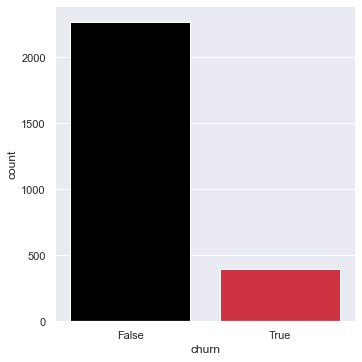

In [19]:
sns.catplot(x='churn', kind='count', data=df, palette=['#000000','#E7182C'])

In [20]:
customers = df.index.nunique()
churned = df.groupby('phone_number')['churn'].sum().sum()

print(f'Of the {customers} unique customers, {round((churned/customers)*100, 1)}% or {churned} made no additional purchases during the six months following the snapshot period.')

Of the 2666 unique customers, 14.9% or 398 made no additional purchases during the six months following the snapshot period.


### Description:
* Of the 2666 unique customers, 14.9% or 398 made no additional purchases during the six months following the snapshot period.
* There is a clear imbalance between customers who have churned and those who have not. 

<AxesSubplot:>

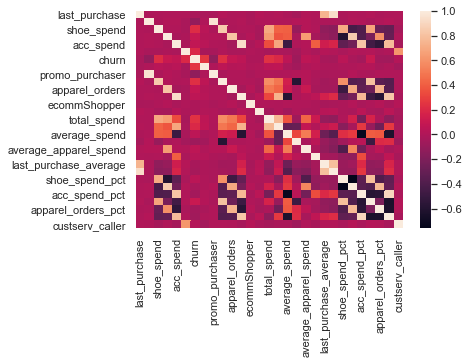

In [21]:
sns.heatmap(df.corr())

### Description:
* There are a few correlated variables that appear to have a causal relationship. For example the amount a customer spent on shoes is directly related to the number of shoe orders they placed. This could yield issues of multicollinearity (may need to be accounted as it could make a model more sensitive to small changes).
*  Shoe and accessories (both spend and orders) and calls to customer service appear to be positively correlated with churn. This could mean that the more a customer spends/orders in those categories and the more calls he/she places through customer service, the more likely he/she is to churn.

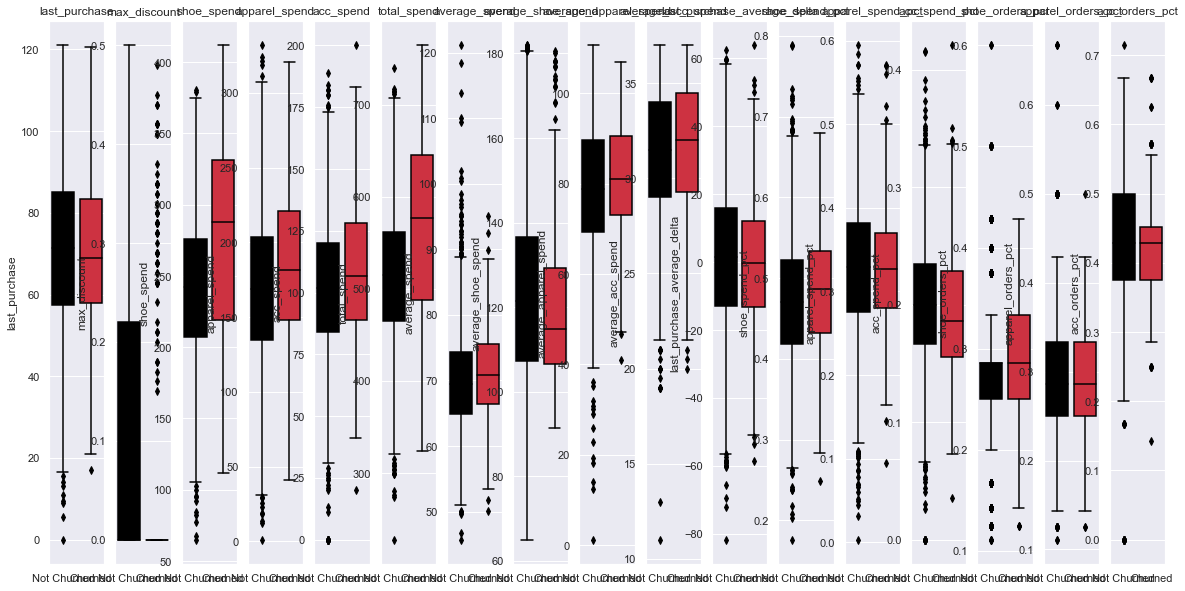

In [22]:
length = len(float_cols)

fig,axs = plt.subplots(nrows=1, ncols=length, figsize=(20,10))
i = 0

for col in float_cols:
    i+=1
    sns.boxplot(x='churn', y=col, data=df, palette=['#000000','#E7182C'], ax=axs[i-1])

    axs[i-1].set_title(col)
    axs[i-1].set_xticks([0,1])
    axs[i-1].set_xticklabels(['Not Churned','Churned'])
    axs[i-1].set_xlabel('')

### Description:
* Any churned customer that received a discount is an outlier relative to that group. This means many customers who churned didn't receive discounts.
* There are relationships between the amount a customer spends on shoes, the number of shoe orders, and the percentage of their total orders/spend that shoes make up and their likelihood of churning. This could indicate shoe customers are less brand loyal and more likely to churn than those who purchase apparel or accessories. That said, when a customer spends more per pair of shoes, they appear to be less likely to churn.
* There is a relationship between the percentage the percentage of total orders/spend that accessories make up and a customer's likelihood of churning.
* There is a slight relationship between the amount a customer spends and their likelihood of churning.

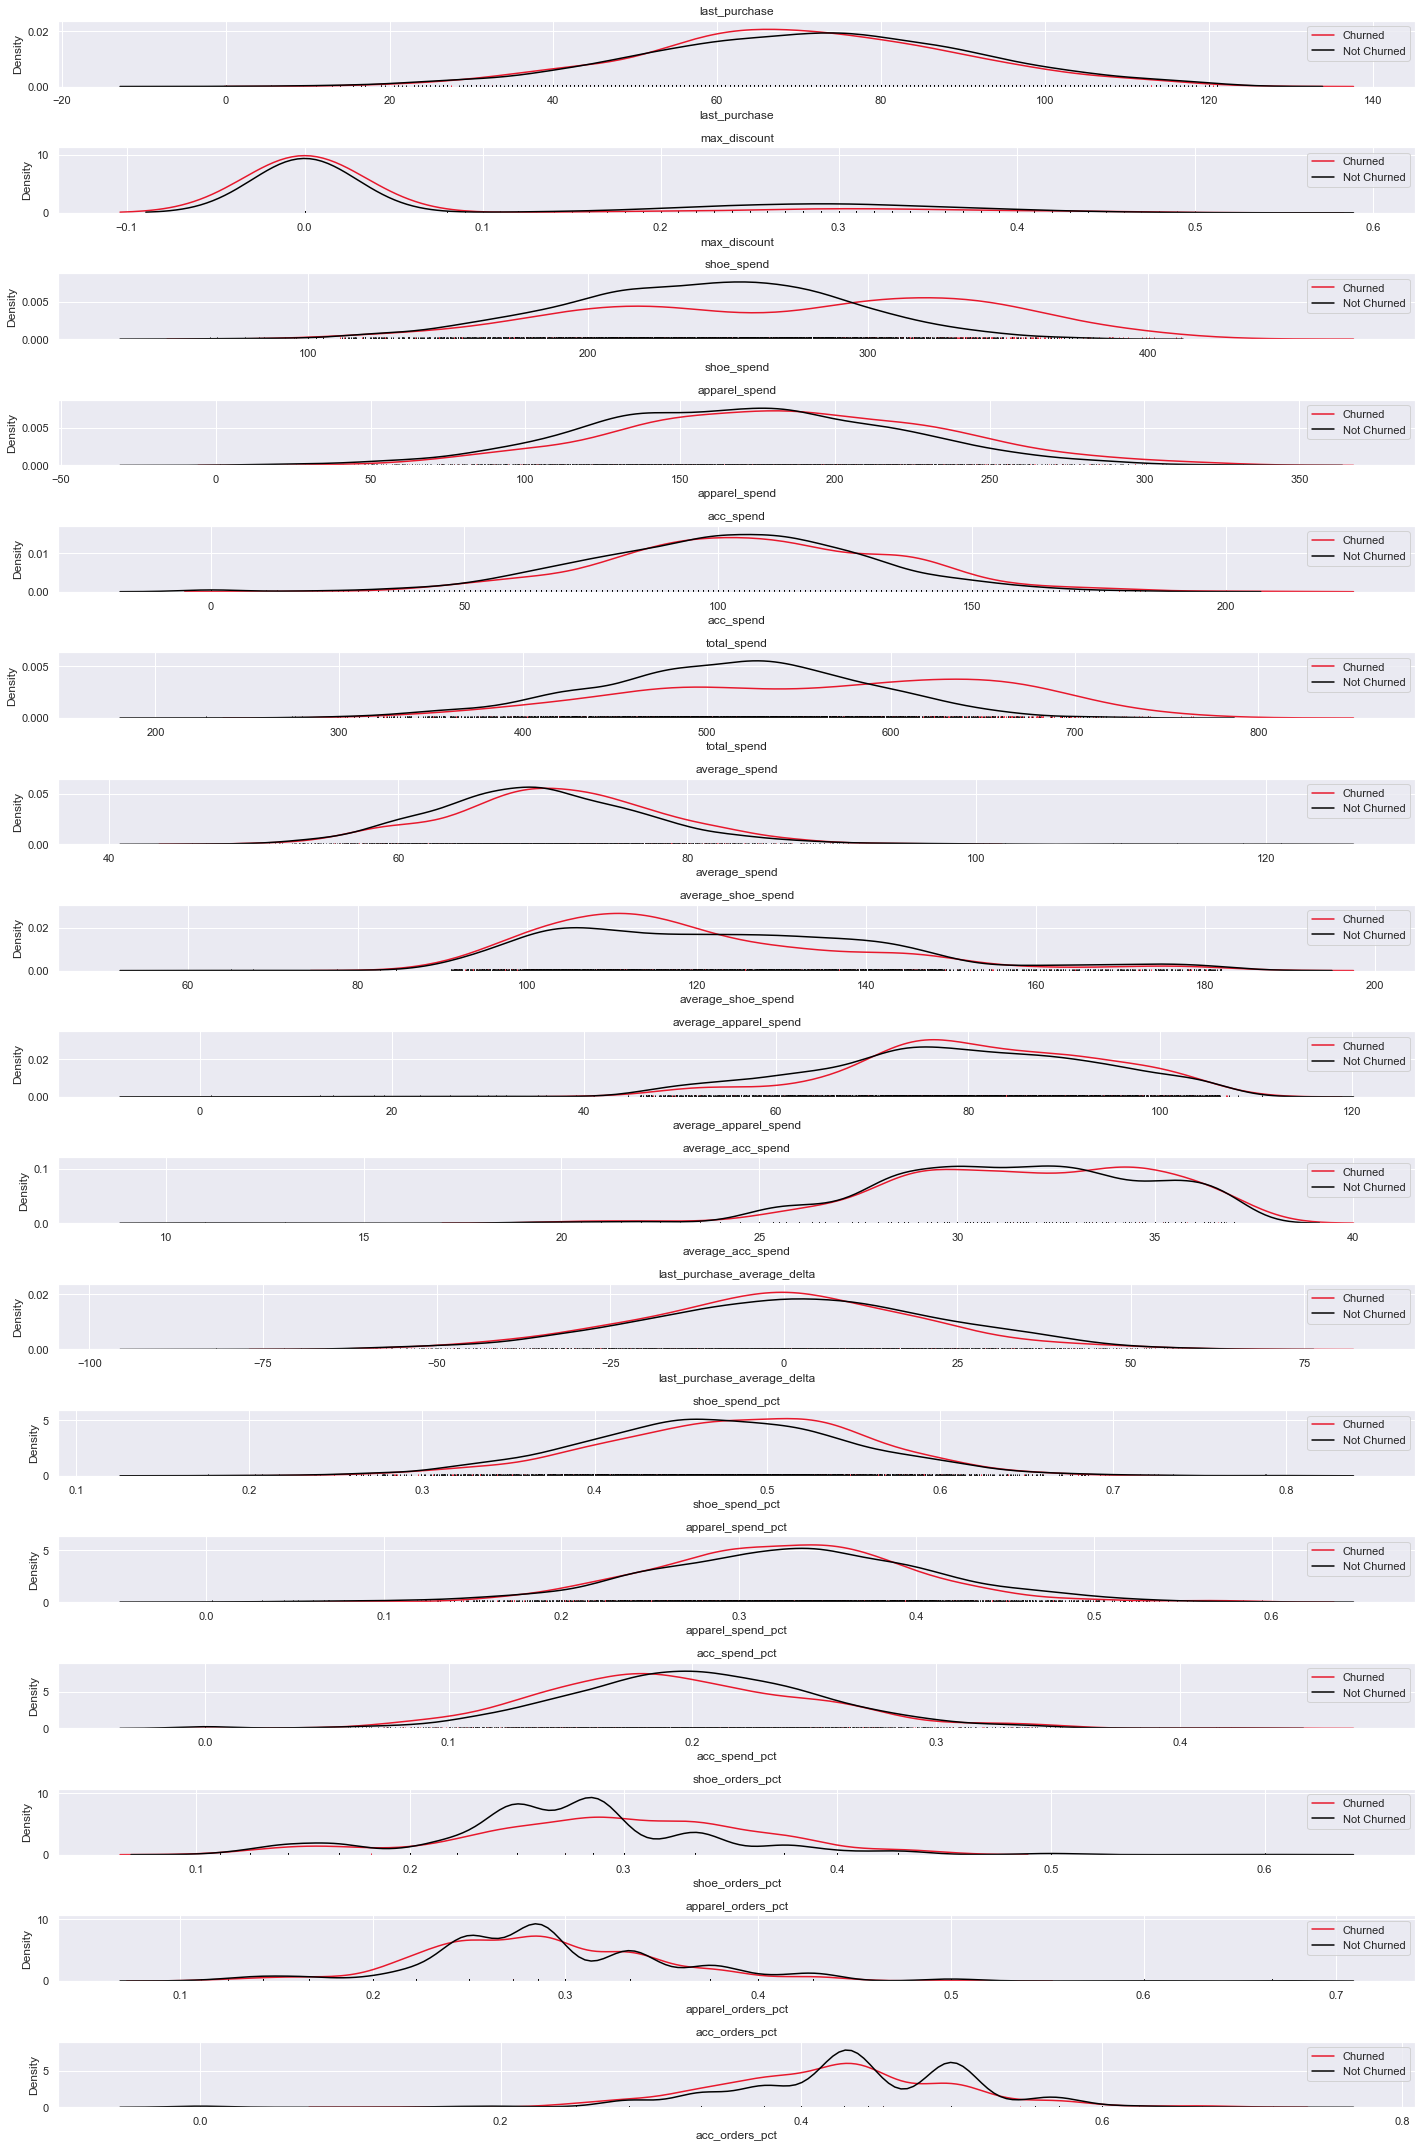

In [23]:
length = len(float_cols)

fig,axs = plt.subplots(nrows=length, ncols=1, figsize=(20,30))
i = 0

for col in float_cols:
    i+=1
    sns.distplot(churned_df[col], label='Churned', color='#E7182C', hist=False, rug=True, ax=axs[i-1])
    sns.distplot(nonchurned_df[col], label='Not Churned', color='#000000', hist=False, rug=True, ax=axs[i-1])

    axs[i-1].set_title(col)
    axs[i-1].legend()
    fig.tight_layout()

### Description:
* These distribution plots largely indicate the same trends as the boxplots above.

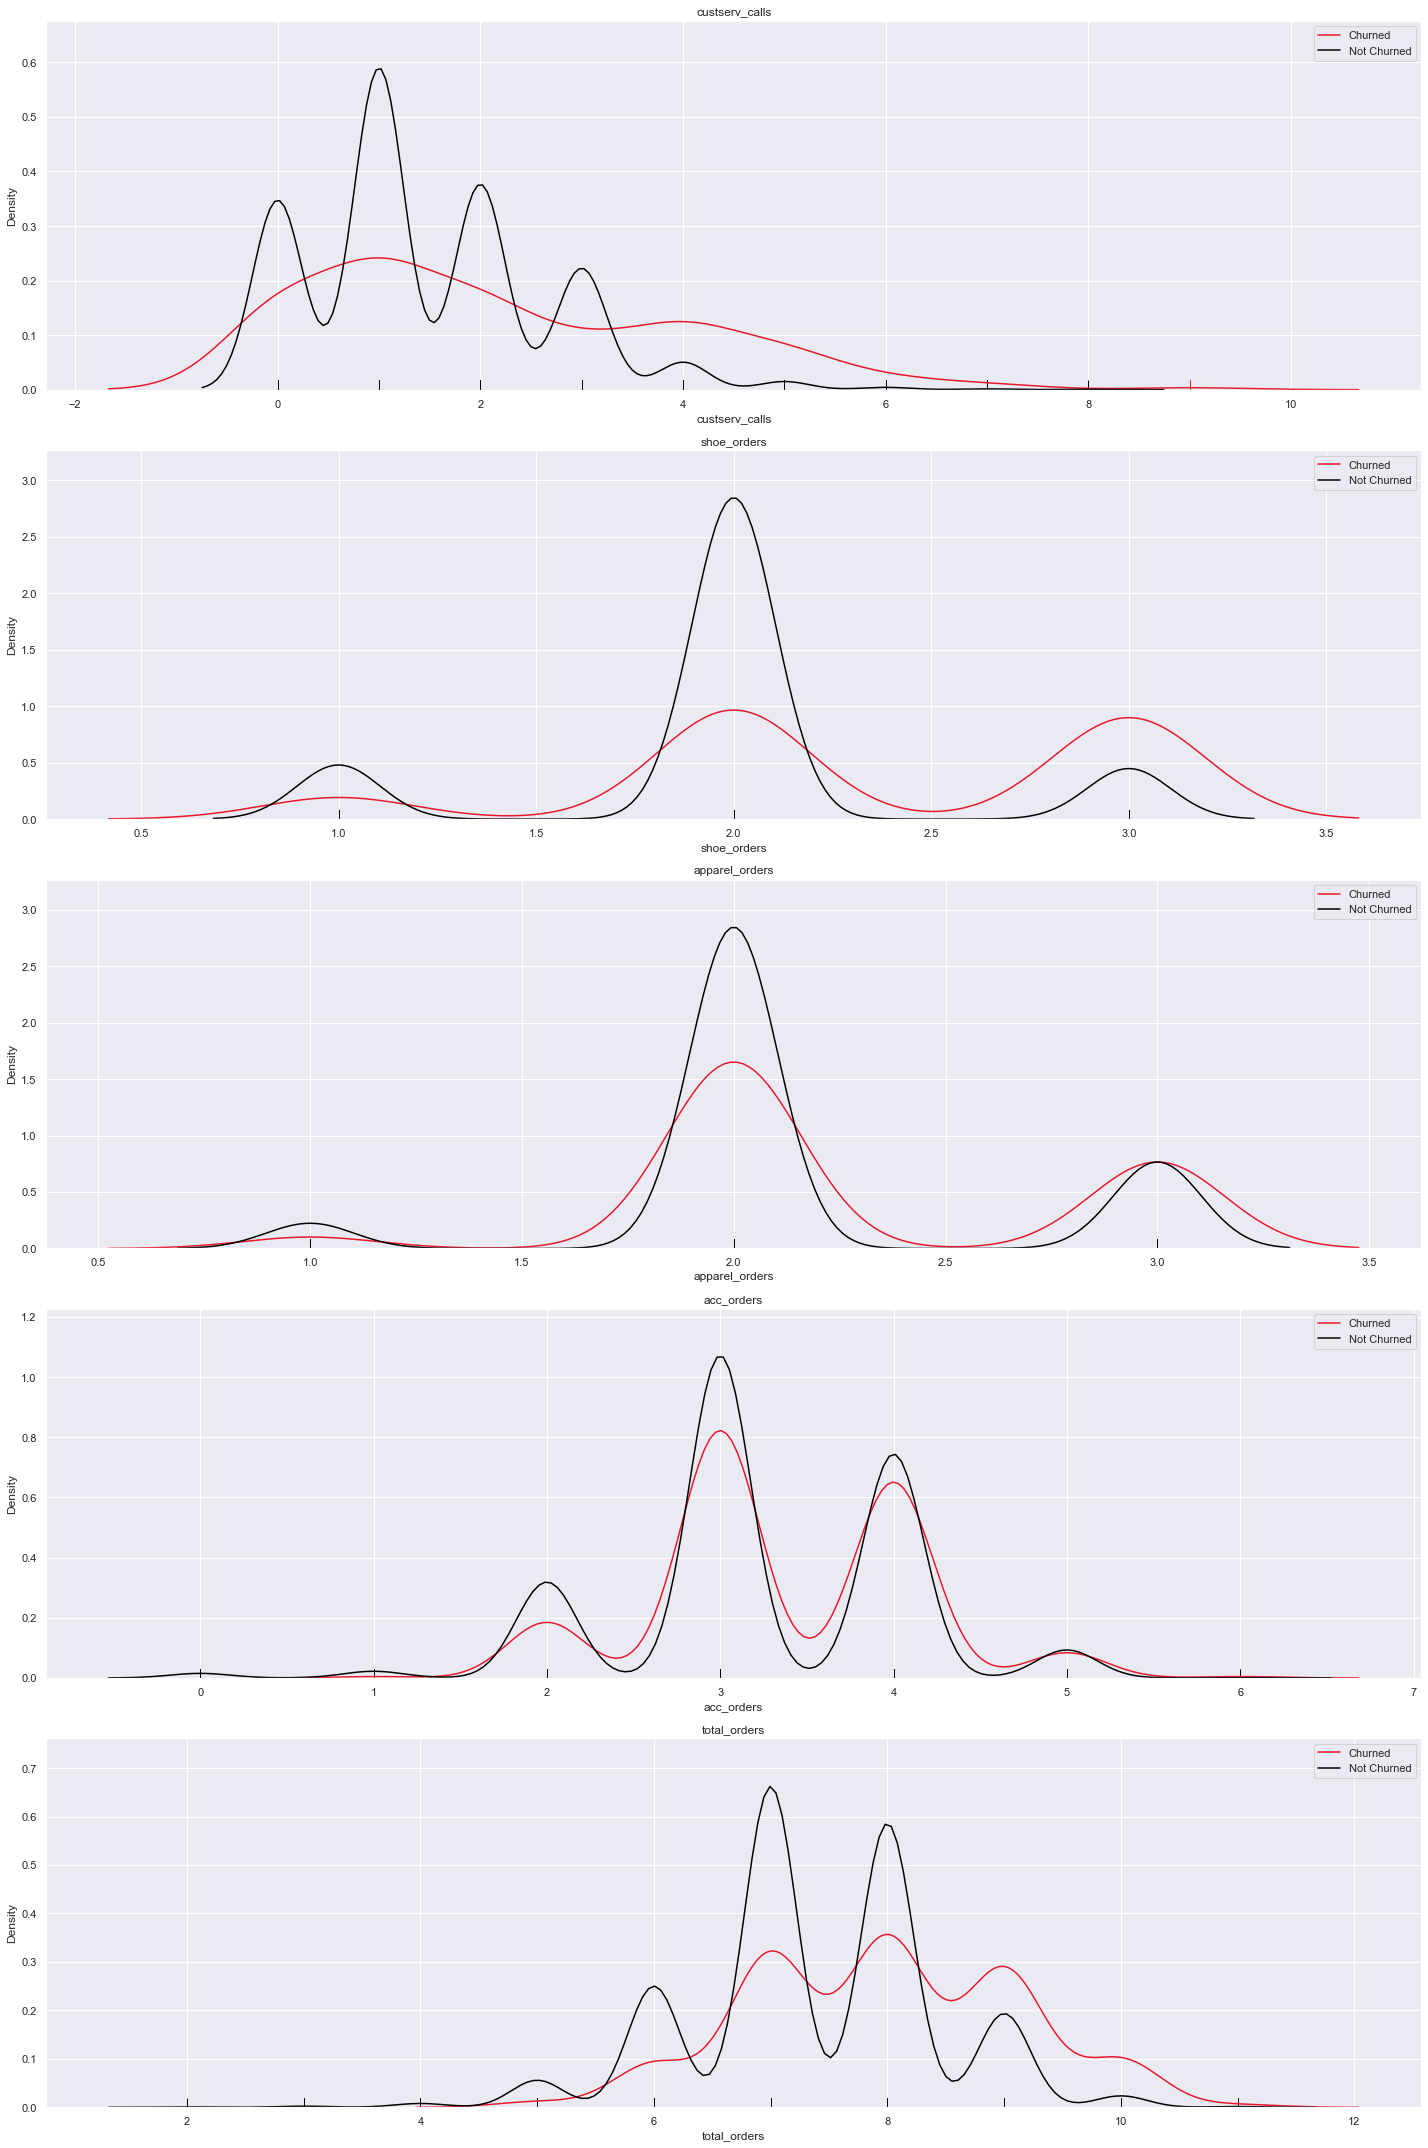

In [24]:
length = len(int_cols)

fig,axs = plt.subplots(nrows=length, ncols=1, figsize=(20,30))
i = 0

for col in int_cols:
    i+=1
    sns.distplot(churned_df[col], label='Churned', color='#E7182C', rug=True, bins=range(0,10), ax=axs[i-1], hist=False)
    sns.distplot(nonchurned_df[col], label='Not Churned', color='#000000', rug=True, bins=range(0,10), ax=axs[i-1], hist=False)

    axs[i-1].set_title(col)
    axs[i-1].legend()
    fig.tight_layout()

### Description:
* There appears to be a clear relationship between the number of calls a customer places to customer service and their status as "churned".
* There appears to be relationships between the number of total orders and types of orders a customer places to customer service and their status as "churned". More apparel and accessory orders indicates a lower likelihood of churning.

<AxesSubplot:xlabel='acc_purchasers'>

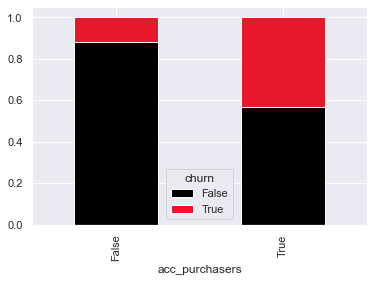

In [25]:
pd.crosstab(index=df['acc_purchasers'], columns=df['churn'], normalize='index').sort_values(by=0, ascending=False).plot(
    kind='bar', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* A higher proportion of accessory purchasers churned.

<AxesSubplot:xlabel='promo_purchaser'>

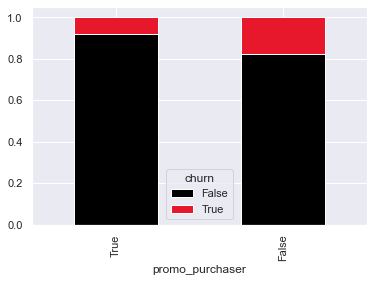

In [26]:
pd.crosstab(index=df['promo_purchaser'], columns=df['churn'], normalize='index').sort_values(by=0, ascending=False).plot(
    kind='bar', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* A lower proportion of promo-purchasers churned.

<AxesSubplot:xlabel='ecommShopper'>

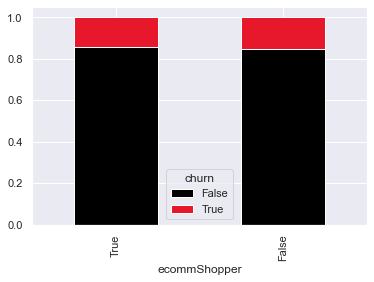

In [27]:
pd.crosstab(index=df['ecommShopper'], columns=df['churn'], normalize='index').sort_values(by=0, ascending=False).plot(
    kind='bar', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* There isn't a clear difference between ecommerce shoppers and traditional shoppers as it relates to churn.

### Description:
* A higher proportion of accessory purchasers churned.

<AxesSubplot:xlabel='gender'>

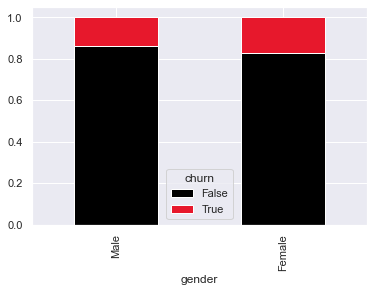

In [28]:
pd.crosstab(index=df['gender'], columns=df['churn'], normalize='index').sort_values(by=0, ascending=False).plot(
    kind='bar', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* Women are slightly more likely to churn than men.

<AxesSubplot:ylabel='state'>

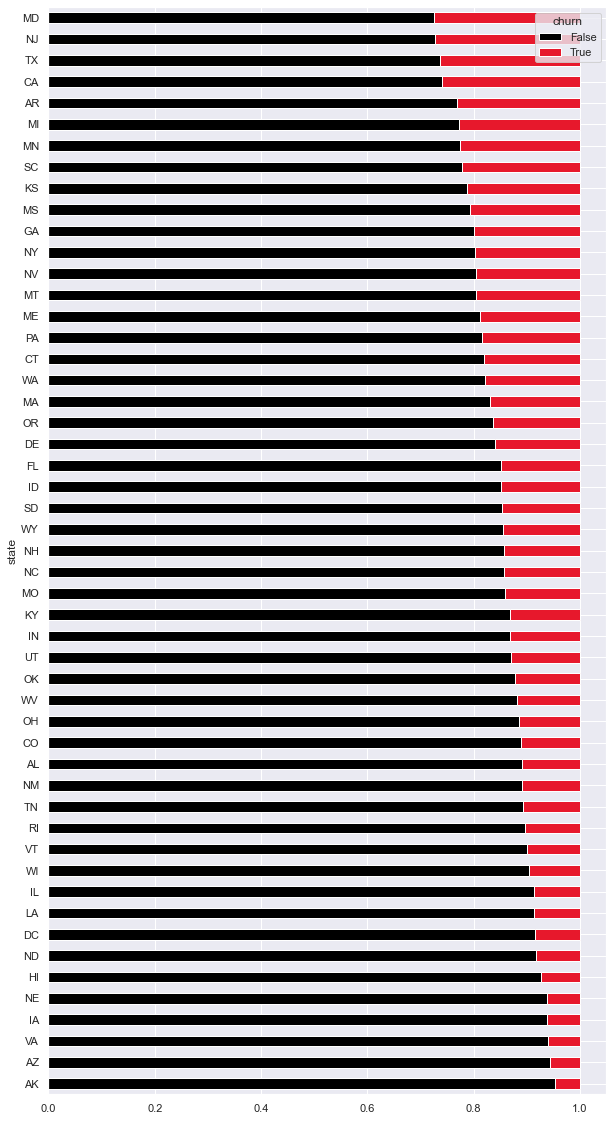

In [29]:
pd.crosstab(index=df['state'], columns=df['churn'], normalize='index').sort_values(by=0, ascending=False).plot(
    kind='barh', 
    stacked=True, 
    color=['#000000','#E7182C'], 
    figsize=(10,20)
)

### Description:
* There are a few states that have a higher proportion of churn than others, but the dataset samples are small and may not be representative of the entire customer base.

<AxesSubplot:ylabel='region'>

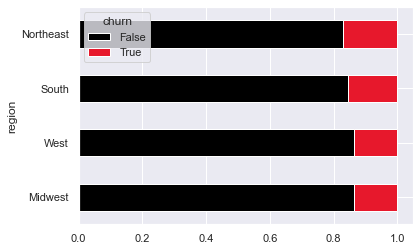

In [30]:
pd.crosstab(index=df['region'], columns=df['churn'], normalize='index').sort_values(by=0, ascending=False).plot(
    kind='barh', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* There is a slight relationship between region and churn, but the dataset samples are small and may not be representative of the entire customer base.

<AxesSubplot:ylabel='subregion'>

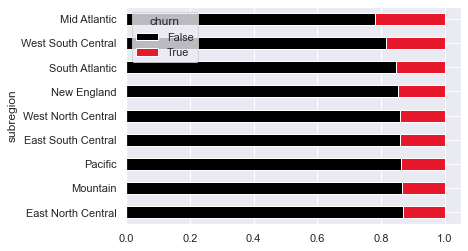

In [31]:
pd.crosstab(index=df['subregion'], columns=df['churn'], normalize='index').sort_values(by=0, ascending=False).plot(
    kind='barh', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* There is a slight relationship between subregion and churn, but the dataset samples are small and may not be representative of the entire customer base.

---

# Build and Evaluate Model

In [32]:
# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Selection/Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, roc_auc_score, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, precision_recall_curve

## Define Variables

In [33]:
for col in bool_cols:
    df[col] = df[col].astype(int)

In [34]:
# Determine dependent and independent variables based on dataset
y = df['churn']
X = df.drop(['churn','area_code','state','subregion'], axis=1)

Dropping state, subregion, and area codes from the population due to potential for overfitting.

---

## Normalize/Standardize Data (Set-Up Pipeline Steps and Hyperparameter Space)


In [35]:
from category_encoders.target_encoder import TargetEncoder

# Preprocessing Pipeline
numeric_features = list(X.select_dtypes(include=['number']))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('normalize', MinMaxScaler(feature_range=(0,1)))])

categorical_features = list(X.select_dtypes(include=['category','object']))
categorical_transformer = Pipeline(steps=[
    ('targetencoder', TargetEncoder(cols=categorical_features))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
)

## Build Initial Model (Classification or Regression)

In [36]:
# Split Data into Training and Test Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=23, shuffle=True)

# Instantiate Baseline Classification Models
classifiers = [
    RandomForestClassifier(), 
    GradientBoostingClassifier(), 
    XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)
]

# Fit to the training set
for clf in classifiers:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    
    # Scoring Metrics
    acc = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    roc_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()
    precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision').mean()
    recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall').mean()
    f1 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1').mean()

    print(pipeline.named_steps['classifier'].__class__.__name__)
    print(' Accuracy: {}'.format(acc))
    print(' AUC Score: {}'.format(roc_score))
    print(' Precision: {}'.format(precision))
    print(' Recall: {}'.format(recall))
    print(' F1 Score: {}'.format(f1))
    print('\n')

RandomForestClassifier
 Accuracy: 0.9269661654135339
 AUC Score: 0.8835931085718295
 Precision: 0.909400518181006
 Recall: 0.5746994535519125
 F1 Score: 0.7098122309243944


GradientBoostingClassifier
 Accuracy: 0.9314699248120301
 AUC Score: 0.8949482780200431
 Precision: 0.8551321472523847
 Recall: 0.6576502732240437
 F1 Score: 0.7425766530992116


XGBClassifier
 Accuracy: 0.9284674185463659
 AUC Score: 0.8874404800171435
 Precision: 0.8561322686322687
 Recall: 0.6344808743169399
 F1 Score: 0.7270813024421272




## Base Model Selection: Gradient Boosted Classifier

__Accuracy Score__
* The Gradient Boosted Classifier had the highest accuracy score of any of the baseline models.
* In this particular case, accuracy score can be misleading given the imbalanced nature of the target variable: churn.

__AUC Score__
* The Gradient Boosted Classifier had the highest AUC score of any of the baseline models.
* This is a good, comparative indication of model strength for binary classification.

__Precision__
* The XGBClassifier had the highest Recall score of any of the baseline models, slightly higher than the Gradient Boosted Classifier.
* Specifically, this yields the ratio of churned customers identified correctly as a percentage of churned customers predicted.
* This indicates the ability of the model to identify failed devices. A higher value indicates fewer false positives.

__Recall/Sensitivity__
* The Gradient Boosted Classifier had the highest Recall score of any of the baseline models, slightly higher than the XGBClassifier.
* Specifically, this yields the ratio of churned customers identified correctly as a percentage of total customers in the dataset.
* This indicates the ability of the model to identify the relevant datapoints. A higher value indicates fewer false negatives.

__F1 Score__
* The Gradient Boosted Classifier slightly outperformed the XGBClassifier.
* Specifically, this takes into account both Precision and Recall (their harmonic mean) to assess the model's accuracy on the dataset.

__Across all of the metrics, the Gradient Boosted Classifier outperforms the other models listed.__

---

## Hyperparameter Tuning

### Optuna
#### Use Optuna package to determine the optimal hyperparameters

In [37]:
import optuna

# Turn off optuna log notes
optuna.logging.set_verbosity(optuna.logging.WARN)

# Set Classifier
classifier = GradientBoostingClassifier(random_state=42)

def objective(trial):

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Random Forest Classifier
    if pipeline.named_steps['classifier'].__class__.__name__ == 'RandomForestClassifier':
        parameters = {
            'classifier__max_depth': trial.suggest_int('max_depth', 2, 32, step=2),
            'classifier__n_estimators': trial.suggest_int('n_estimators', 100, 2000, step=100)
        }
    
    # Gradient Boosting Classifier
    elif pipeline.named_steps['classifier'].__class__.__name__ == 'GradientBoostingClassifier':
        parameters = {
            'classifier__max_depth': trial.suggest_int('max_depth', 2, 32, step=2),
            'classifier__n_estimators': trial.suggest_int('n_estimators', 10, 500),
            'classifier__learning_rate': trial.suggest_uniform('learning_rate', 0.001, 1),
            'classifier__min_samples_split': trial.suggest_uniform('min_samples_split', 0.1, 1),
            'classifier__min_samples_leaf': trial.suggest_uniform('min_samples_leaf', 0.1, 0.5),
            'classifier__max_features': trial.suggest_categorical('max_features', ['auto','log2', 'sqrt'])
        }

    # XGBoost Classifier 
    elif pipeline.named_steps['classifier'].__class__.__name__ == 'XGBClassifier':
        parameters = {
            'classifier__max_depth': trial.suggest_int('max_depth', 2, 32, step=2),
            'classifier__n_estimators': trial.suggest_int('n_estimators', 10, 500),
            'classifier__learning_rate': trial.suggest_uniform('learning_rate', 0.001, 1),
            'classifier__min_samples_split': trial.suggest_uniform('min_samples_split', 0.1, 1),
            'classifier__min_samples_leaf': trial.suggest_uniform('min_samples_leaf', 0.1, 0.5),
            'classifier__max_features': trial.suggest_categorical('max_features', ['auto','log2', 'sqrt'])
        }
    else:
        pass
    
    model = pipeline.fit(X_train, y_train)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    accuracy = score.mean()
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(study_name='Optimized Classification Model', direction='maximize')
study.optimize(objective, n_trials=100)

In [38]:
# Extracting the best parameters from model
model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(**study.best_params, random_state=42))
    ])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('normalize',
                                                                   MinMaxScaler())]),
                                                  ['last_purchase',
                                                   'max_discount', 'shoe_spend',
                                                   'apparel_spend', 'acc_spend',
                                                   'custserv_calls',
                                                   'acc_purchasers',
                                                   'promo_purchaser',
                                                   'shoe_orders',
                                                   'apparel_

The model has been optimized with the appropriate hyperparameters (learning rate, depth, estimators) to yield the highest f1 score against validation data (using cross-validation). F1 provides an appropriate balance between determining which datapoints are relevant and how precise the model is at identifying churned customers.

## Evaluate Model

In [39]:
# Evaluate Model Performance on Training Set
predictions = model.predict(X_train)

acc = accuracy_score(y_train, predictions)
roc_score = roc_auc_score(y_train, predictions, average='weighted')
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)
class_report = classification_report(y_train, predictions)

print(' Accuracy: {}'.format(acc))
print(' AUC Score: {}'.format(roc_score))
print(' Precision: {}'.format(precision))
print(' Recall: {}'.format(recall))
print(' F1 Score: {}'.format(f1))
print(' Classification Report:\n{}'.format(class_report))
print('\n')

# Evaluate Model Performance on Test Set
predictions = model.predict(X_val)

acc = accuracy_score(y_val, predictions)
roc_score = roc_auc_score(y_val, predictions, average='weighted')
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
class_report = classification_report(y_val, predictions)

print(' Accuracy: {}'.format(acc))
print(' AUC Score: {}'.format(roc_score))
print(' Precision: {}'.format(precision))
print(' Recall: {}'.format(recall))
print(' F1 Score: {}'.format(f1))
print(' Classification Report:\n{}'.format(class_report))
print('\n')

 Accuracy: 0.8924462231115557
 AUC Score: 0.6688237872188896
 Precision: 0.8467741935483871
 Recall: 0.3488372093023256
 F1 Score: 0.49411764705882355
 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1698
           1       0.85      0.35      0.49       301

    accuracy                           0.89      1999
   macro avg       0.87      0.67      0.72      1999
weighted avg       0.89      0.89      0.87      1999



 Accuracy: 0.8875562218890555
 AUC Score: 0.6732863085548925
 Precision: 0.72
 Recall: 0.3711340206185567
 F1 Score: 0.4897959183673469
 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       570
           1       0.72      0.37      0.49        97

    accuracy                           0.89       667
   macro avg       0.81      0.67      0.71       667
weighted avg       0.87      0.89      0.87       667





## Analysis
* More data could be used to help improve the accuracy of this model.
* The model is exhibiting signs of slightly overfitting the training set (indicated by marginally higher performance against the training set than the test set).
* We encoded the categorical features with the target mean (% of churn) in each category. This can lead to overfitting in smaller datasets due to poor sampling.
* Additional variables could be dropped to prevent from overfitting the training set.
    * For example, there is a high correlation between shoe_spend and shoe_orders (likely causal) which could result in worse generalization.

---

## SHAP for Feature Importance

In [40]:
# Define Dataset to Explain with SHAP
features = X_val.iloc[:]
features_display = X_val.loc[features.index]

In [41]:
import shap

shap.initjs()

# Create Object That Can Calculate SHAP Values
explainer = shap.TreeExplainer(model['classifier'])

# Apply Preprocessing to X_test
observations = model['preprocessor'].transform(X_val)

# Calculate SHAP Values
shap_values = explainer(observations)

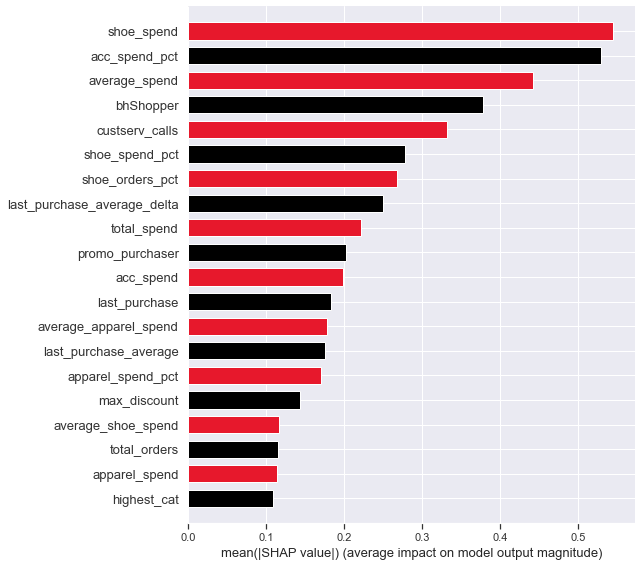

In [42]:
shap.summary_plot(shap_values.values, X_val, plot_type='bar', color=['#000000','#E7182C'])

### Summary Plot
* Feature importance: Variables are ranked in descending order.
* Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
* Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
* Correlation: A high level of the “alcohol” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say “volatile acidity” is negatively correlated with the target variable.

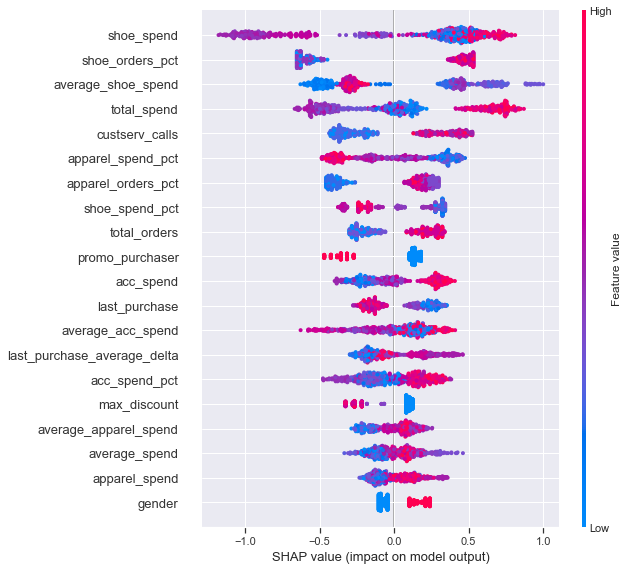

In [43]:
shap.summary_plot(shap_values, features=observations, feature_names=numeric_features+categorical_features)

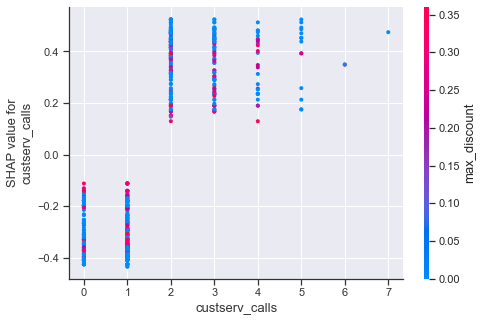

In [44]:
# Dependence Contribution Plot
variable = 'custserv_calls'
interaction = 'max_discount'
shap.dependence_plot(variable, shap_values.values, features, interaction_index=interaction)

### Dependence Contribution Plot
* Shows the marginal effect that one or two variables have on the predicted outcome.
* Each dot represents a row of the data
* Horizontal location is the actual value from the dataset
* Vertical location shows what having that value did to the prediction
* Spread between two points at the same horizontal location suggests that other features must interact with the predictor variable

## Analysis
* The amount of money a customer spends on shoes and accessories appears to negatively affect retention.
* Calls to customer service appear to be very relevant for identifying whether a customer will churn.
* Customers who receive larger discounts tend to continue purchasing products and exhibit more robust brand loyalty.

---

# Key Takeaways
__Application of Machine Learning for the Marketing Team__
* Initial conclusions indicate that intervention and marketing could yield fruitful results for customer retention:
    * __Target promotions to customers who call customer service.__
        * Customers who call customer service more frequently and receive fewer discounts are more likely to churn over time. Promotional intervention with this population could increase retention in this group.
    * __Recommend apparel products, accessories, and design more complete outfits.__
        * Shoes are less "sticky", meaning customers who purchase shoes are more likely to churn than others.
        * The marketing team could recommend apparel and accessories to pair with shoes to complete a customer's outfit/"look".
* For the initial deliverable, the tree-based classification model is able to provide predictive capabilities to help the marketing team increase customer retention. 
    * It also serves as a launching point for more complex models that can take additional factors into account.

__Interpretability__
* It is important to understand what metrics are most important and work with the marketing team to identify why they are important.
* From here, we can start determine important causal relationships.

__Deployment Strategy__
* A deployment strategy will be required for the marketing team to access the model and/or its outputs.
* Things to keep in mind:
    * Frequency of use
        * Will this model be utilized on an ongoing basis to classify customers as likely to churn or is it specifically for this individual marketing campaign?
    * Preferred method of consumption
        * Does the marketing team use any existing models? Do they prefer annotated reports, model outputs, a persistent inference endpoint?
    *  Deployment should keep in mind the existing infrastructure/applications/pipelines/integration


__Future Areas of Exploration__
* Augmenting the existing dataset with additional customers from CRM and additional features.
* Continued integration with the marketing team to proactively address churn and encourage customer acquisition.
* Cluster analysis to target specific groups of customers likely to churn with more refined promotions.
* Analysis based on region to perform additional subpopulation analysis.
* SKU analysis to determine which products are yielding calls to customer service.
* A/B testing to assess the success of the marketing team's promotional efforts and which yield better results.

---

# Import Test Data

In [45]:
# Import Test Data

# Load dataset from CSV
path = 'C:\\Users\\577497\\Documents\\GitHub\\Customer-Churn\\2022_03_16\\'
#path = '/Users/davidodonnell/Documents/GitHub/Customer-Churn/'
filename = 'test.csv'

orig_test_df = pd.read_csv(path+filename, header=0, parse_dates=True).rename(columns={'apparell_spend': 'apparel_spend'})

In [46]:
test_df = orig_test_df.copy()

## Clean Up Data (Types and Errors)

In [47]:
test_df['phone_number'] = test_df['area_code'].astype(str) + '-' + test_df['phone'].astype(str)

In [48]:
test_df.set_index('phone_number', inplace=True)
test_df.drop('phone', axis=1, inplace=True)

In lieu of customer id (which was not present in the dataset), "phone_number" is a unique value that can serve as the primary key.

### Handling Missing Data and Null Values

In [49]:
# Improper value in apparel_spend
test_df.loc[test_df['max_discount'].isnull()]

# Impute errant value with median apparel_spend/apparel_orders * apparel_orders
test_df['max_discount'] = np.where(test_df['max_discount'].isnull(), 0, test_df['max_discount'])

Any maximum discounts that are errant/null have been imputed with 0 as there were no customers marked as "promo_purchaser". 

In [50]:
# Improper value in apparel_spend
test_df.loc[test_df['apparel_spend']=='a']

# Impute errant value with median apparell_spend/apparel_orders * apparel_orders
test_df['apparel_spend'] = np.where(test_df['apparel_spend']!='a', test_df['apparel_spend'], median_apparel_spend_order*test_df['apparel_orders'])

Any apparel spend that are errant/null have been imputed with the median apparel spend per order multiplied by the number of orders. 

In [51]:
# Replace Errant State Code
test_df['state'] = np.where(test_df['state']=='ARZ','AZ', test_df['state'])
test_df['state'] = np.where(test_df['state']=='AD','CA', test_df['state']) #Impute with CA (due to phone number area code)

# Improper values in state
test_df.loc[~test_df['state'].isin(state_codes)]

test_df['state'] = np.where(test_df['state'].isin(state_codes), test_df['state'], np.nan)

Imputed errant state values with assumptions. Any other value in the "state" column not pertaining to a state will be made null.

### Adjust Column Datatypes

In [52]:
# Format Continuous Variables as Floats
float_cols = [
    'last_purchase',
    'max_discount',
    'shoe_spend',
    'apparel_spend',
    'acc_spend'
]

for col in float_cols:
    test_df[col] = test_df[col].astype(str).str.replace(',', '')
    test_df[col] = test_df[col].astype(str).str.replace('$', '')
    test_df[col] = test_df[col].astype(float, errors='ignore')


# Format Integer Variables as Integers
int_cols = [
    'custserv_calls',
    'shoe_orders',
    'apparel_orders',
    'acc_orders'
]

for col in int_cols:
    test_df[col] = test_df[col].astype(str).str.replace(',', '')
    test_df[col] = test_df[col].astype(str).str.replace('$', '')
    test_df[col] = test_df[col].astype(float).round(0).astype(int)


# Format Boolean Variables as Booleans
bool_cols = [
    'acc_purchasers',
    'promo_purchaser',
    'ecommShopper',
    'bhShopper'
]

for col in bool_cols:
    test_df[col] = test_df[col].astype(bool)

# Format String Variables as Objects
str_cols = [
    'gender',
    'state',
    'area_code'
]

for col in str_cols:
    test_df[col] = test_df[col].astype(str)

---

### Create Additional Features

In [53]:
# Total Spend
test_df['total_spend'] = test_df['shoe_spend']+test_df['apparel_spend']+test_df['acc_spend']

# Total Orders
test_df['total_orders'] = test_df['shoe_orders']+test_df['apparel_orders']+test_df['acc_orders']

# Average Order Costs
test_df['average_spend'] = test_df['total_spend']/test_df['total_orders']
test_df['average_shoe_spend'] = test_df['shoe_spend']/test_df['shoe_orders']
test_df['average_apparel_spend'] = test_df['apparel_spend']/test_df['apparel_orders']
test_df['average_acc_spend'] = test_df['acc_spend']/test_df['acc_orders']

# Last Purchase Compared to Average
test_df['last_purchase_average'] = np.where(test_df['last_purchase']>test_df['average_spend'], True, False)
test_df['last_purchase_average_delta'] = test_df['last_purchase']-test_df['average_spend']

# Percent of Total Spend
test_df['shoe_spend_pct'] = test_df['shoe_spend']/test_df['total_spend']
test_df['apparel_spend_pct'] = test_df['apparel_spend']/test_df['total_spend']
test_df['acc_spend_pct'] = test_df['acc_spend']/test_df['total_spend']

# Percent of Total Orders
test_df['shoe_orders_pct'] = test_df['shoe_orders']/test_df['total_orders']
test_df['apparel_orders_pct'] = test_df['apparel_orders']/test_df['total_orders']
test_df['acc_orders_pct'] = test_df['acc_orders']/test_df['total_orders']

# Highest/Lowest Purchase Categories
test_df['highest_cat'] = np.where((test_df['shoe_spend']>test_df['acc_spend'])&(test_df['shoe_spend']>test_df['apparel_spend']),'shoes',
                         np.where((test_df['apparel_spend']>test_df['acc_spend'])&(test_df['apparel_spend']>test_df['shoe_spend']),'apparel',
                         np.where((test_df['acc_spend']>test_df['shoe_spend'])&(test_df['acc_spend']>test_df['apparel_spend']),'acc',np.nan)))

test_df['lowest_cat'] = np.where((test_df['shoe_spend']<test_df['acc_spend'])&(test_df['shoe_spend']<test_df['apparel_spend']),'shoes',
                        np.where((test_df['apparel_spend']<test_df['acc_spend'])&(test_df['apparel_spend']<test_df['shoe_spend']),'apparel',
                         np.where((test_df['acc_spend']<test_df['shoe_spend'])&(test_df['acc_spend']<test_df['apparel_spend']),'acc',np.nan)))

In [54]:
# Region
test_df['region'] = test_df['state'].map(
    {'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','RI':'Northeast','CT':'Northeast','NY':'Northeast','NJ':'Northeast','PA':'Northeast',
    'OH':'Midwest','MI':'Midwest','IN':'Midwest','IL':'Midwest','WI':'Midwest','MO':'Midwest','IA':'Midwest','MN':'Midwest','ND':'Midwest','SD':'Midwest','NE':'Midwest','KS':'Midwest',
    'DE':'South','MD':'South','DC':'South','VA':'South','WV':'South','NC':'South','KY':'South','TN':'South','SC':'South','GA':'South','FL':'South','AL':'South','MS':'South','AR':'South','LA':'South','OK':'South','TX':'South',
    'NM':'West','CO':'West','WY':'West','MT':'West','ID':'West','UT':'West','AZ':'West','CA':'West','NV':'West','OR':'West','WA':'West','AK':'West','HI':'West'}
)

# Subregion
test_df['subregion'] = test_df['state'].map(
    {'ME':'New England','NH':'New England','VT':'New England','MA':'New England','RI':'New England','CT':'New England','NY':'Mid Atlantic','NJ':'Mid Atlantic','PA':'Mid Atlantic',
    'OH':'East North Central','MI':'East North Central','IN':'East North Central','IL':'East North Central','WI':'East North Central','MO':'West North Central','IA':'West North Central','MN':'West North Central','ND':'West North Central','SD':'West North Central','NE':'West North Central','KS':'West North Central',
    'DE':'South Atlantic','MD':'South Atlantic','DC':'South Atlantic','VA':'South Atlantic','WV':'South Atlantic','NC':'South Atlantic','KY':'East South Central','TN':'East South Central','SC':'South Atlantic','GA':'South Atlantic','FL':'South Atlantic','AL':'East South Central','MS':'East South Central','AR':'West South Central','LA':'West South Central','OK':'West South Central','TX':'West South Central',
    'NM':'Mountain','CO':'Mountain','WY':'Mountain','MT':'Mountain','ID':'Mountain','UT':'Mountain','AZ':'Mountain','CA':'Pacific','NV':'Mountain','OR':'Pacific','WA':'Pacific','AK':'Pacific','HI':'Pacific'}
)

In [55]:
# Customer Called Customer Service (Boolean)
test_df['custserv_caller'] = np.where(test_df['custserv_calls']>0, True, False)

### Adjust Column Datatypes

In [56]:
# Format Continuous Variables as Floats
float_cols = [
    'last_purchase',
    'max_discount',
    'shoe_spend',
    'apparel_spend',
    'acc_spend',
    'total_spend',
    'average_spend',
    'average_shoe_spend',
    'average_apparel_spend',
    'average_acc_spend',
    'last_purchase_average_delta',
    'shoe_spend_pct',
    'apparel_spend_pct',
    'acc_spend_pct',
    'shoe_orders_pct',
    'apparel_orders_pct',
    'acc_orders_pct'
]

for col in float_cols:
    test_df[col] = test_df[col].astype(str).str.replace(',', '')
    test_df[col] = test_df[col].astype(str).str.replace('$', '')
    test_df[col] = test_df[col].astype(float, errors='ignore')


# Format Integer Variables as Integers
int_cols = [
    'custserv_calls',
    'shoe_orders',
    'apparel_orders',
    'acc_orders',
    'total_orders'
]

for col in int_cols:
    test_df[col] = test_df[col].astype(str).str.replace(',', '')
    test_df[col] = test_df[col].astype(str).str.replace('$', '')
    test_df[col] = test_df[col].astype(float).round(0).astype(int)


# Format Boolean Variables as Booleans
bool_cols = [
    'acc_purchasers',
    'promo_purchaser',
    'ecommShopper',
    'bhShopper',
    'last_purchase_average',
    'custserv_caller',
]

for col in bool_cols:
    test_df[col] = test_df[col].astype(bool)

# Format String Variables as Objects
str_cols = [
    'gender',
    'state',
    'area_code',
    'region',
    'subregion',
    'highest_cat',
    'lowest_cat'
]

for col in str_cols:
    test_df[col] = test_df[col].astype(str)

---

## Define Variables

In [57]:
for col in bool_cols:
    test_df[col] = test_df[col].astype(int)

In [58]:
# Determine dependent and independent variables based on dataset
X_test = test_df.drop(['area_code','state','subregion'], axis=1)

---

## Apply Model to New Data

In [59]:
# Evaluate Model Performance on Test Set
predictions = model.predict(X_test)

orig_test_df['prediction'] = predictions

In [60]:
# Save dataset as CSV
path = 'C:\\Users\\577497\\Documents\\GitHub\\Customer-Churn\\2022_03_16\\'
#path = '/Users/davidodonnell/Documents/GitHub/Customer-Churn/'
filename = 'predictions.csv'

orig_test_df.to_csv(path+filename)

---

## Illustrate Predicted Examples

In [61]:
import shap

shap.initjs()

# Create Object That Can Calculate SHAP Values
explainer = shap.TreeExplainer(model['classifier'])

# Apply Preprocessing to X_test
observations = model['preprocessor'].transform(X_test)

# Calculate SHAP Values
shap_values = explainer.shap_values(observations)

In [62]:
# Set Examples of Customers Who Churned or Not
unchurned_example = orig_test_df.loc[orig_test_df['prediction']==0].head(1).index.values[0]
churned_example = orig_test_df.loc[orig_test_df['prediction']==1].head(1).index.values[0]

In [63]:
shap.force_plot(explainer.expected_value, shap_values[unchurned_example], features=observations[unchurned_example], feature_names=numeric_features+categorical_features)

In [64]:
shap.force_plot(explainer.expected_value, shap_values[churned_example], features=observations[churned_example], feature_names=numeric_features+categorical_features)

---